# Importing Needed Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_probability as tfp

2023-10-26 01:25:45.165070: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Soft Check of data balnce...it is imbalnced. 

In [35]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

# Running a PCA to dig a bit deeper

In [4]:
df = pd.read_csv('./fraud.csv')
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
scaler = StandardScaler()
numerical_features = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
numerical_features = scaler.fit_transform(numerical_features)
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)
X = np.concatenate((numerical_features, df_encoded.drop(['isFraud', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1).values), axis=1)
y = df['isFraud'].values
pca_11 = PCA(n_components=11)  


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X_train_pca_11 = pca_11.fit_transform(X_train)
X_test_pca_11 = pca_11.transform(X_test)
explained_variance = pca_11.explained_variance_ratio_

## Explained Variance

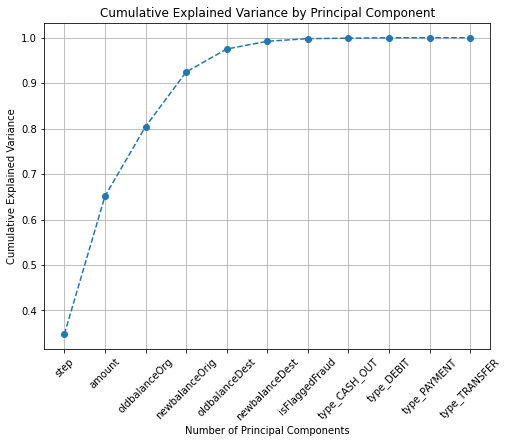

In [49]:
feature_names = df_encoded.drop(['isFraud'], axis=1).columns 
cumulative_variance = np.cumsum(pca_11.explained_variance_ratio_)

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1), feature_names, rotation=45) 
plt.grid()
plt.show()

### The graph above are showing what accounts for majority of the variance in the data

# Feaure Heatmap

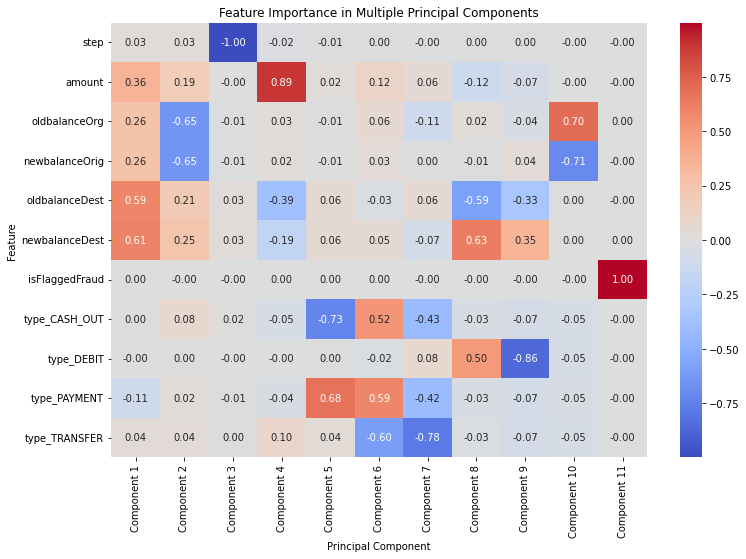

In [52]:
feature_names = df_encoded.drop(['isFraud'], axis=1).columns

loadings_df = pd.DataFrame()

for component in range(11): 
    loadings = pca_11.components_[component]
    loadings_df[f'Component {component + 1}'] = loadings

loadings_df.index = df_encoded.drop(['isFraud'], axis=1).columns

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Importance in Multiple Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.show()

# First Principal Component

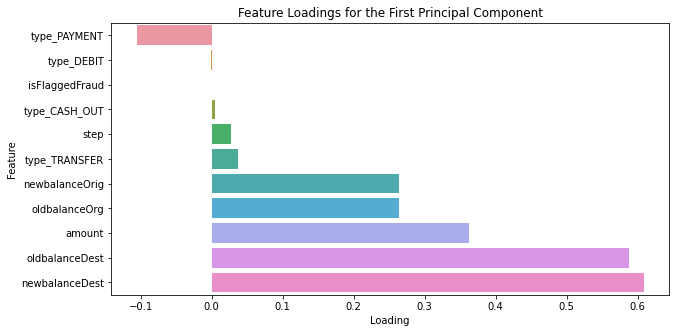

In [53]:
loadings = pca_11.components_[0]
feature_names = df_encoded.drop(['isFraud'], axis=1).columns

# Create a DataFrame to hold the loadings and feature names
loadings_df = pd.DataFrame({'Loading': loadings, 'Feature': feature_names})

# Sort the DataFrame by loadings
loadings_df = loadings_df.sort_values(by='Loading')

plt.figure(figsize=(10, 5))
sns.barplot(x='Loading', y='Feature', data=loadings_df)
plt.title('Feature Loadings for the First Principal Component')
plt.xlabel('Loading')
plt.ylabel('Feature')
plt.show()

# Second Principal Component

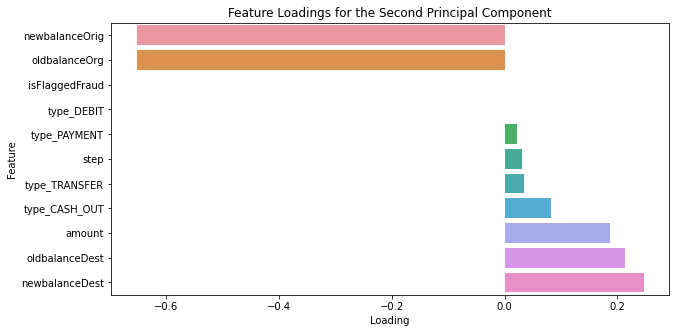

In [54]:

loadings_second = pca_11.components_[1]


loadings_df_second = pd.DataFrame({'Loading': loadings_second, 'Feature': feature_names})


loadings_df_second = loadings_df_second.sort_values(by='Loading')


plt.figure(figsize=(10, 5))
sns.barplot(x='Loading', y='Feature', data=loadings_df_second)
plt.title('Feature Loadings for the Second Principal Component')
plt.xlabel('Loading')
plt.ylabel('Feature')
plt.show()

# 3rd Princiapl Component

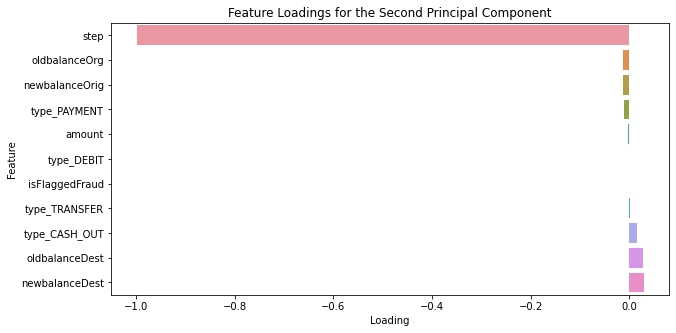

In [55]:

loadings_second = pca_11.components_[2]


loadings_df_second = pd.DataFrame({'Loading': loadings_second, 'Feature': feature_names})


loadings_df_second = loadings_df_second.sort_values(by='Loading')


plt.figure(figsize=(10, 5))
sns.barplot(x='Loading', y='Feature', data=loadings_df_second)
plt.title('Feature Loadings for the Second Principal Component')
plt.xlabel('Loading')
plt.ylabel('Feature')
plt.show()

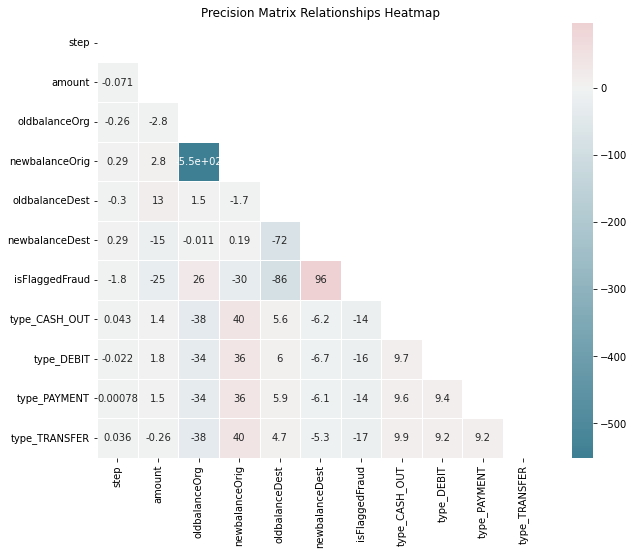

In [68]:
# Create a DataFrame for the precision matrix
precision_df = pd.DataFrame(precision_matrix, columns=feature_names, index=feature_names)

# Create a mask to hide the upper triangle (redundant information)
mask = np.triu(np.ones_like(precision_df, dtype=bool))

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap with a diverging color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(precision_df, annot=True, mask=mask, cmap=cmap, center=0, linewidths=0.5)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

plt.title("Precision Matrix Relationships Heatmap")
plt.show()

# Ommiting Step

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# First Model

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

F1 Score: 0.74


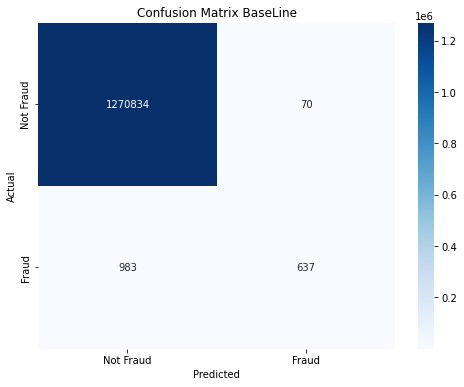

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_base = logistic_model.predict(X_test)


f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')


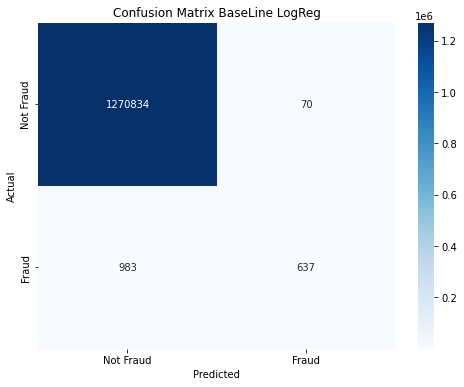

In [94]:

# Create and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix BaseLine LogReg')
plt.savefig('confusion_matrix_Baseline.png')
plt.show()

# MLP Model

Iteration 1, loss = 0.00491714
Iteration 2, loss = 0.00277570
Iteration 3, loss = 0.00260123
Iteration 4, loss = 0.00249805
Iteration 5, loss = 0.00243682
Iteration 6, loss = 0.00234920
Iteration 7, loss = 0.00232515
Iteration 8, loss = 0.00228480
Iteration 9, loss = 0.00225266
Iteration 10, loss = 0.00220714
Iteration 11, loss = 0.00217006
Iteration 12, loss = 0.00215815
Iteration 13, loss = 0.00213027
Iteration 14, loss = 0.00212624
Iteration 15, loss = 0.00210970
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
F1 Score: 0.81


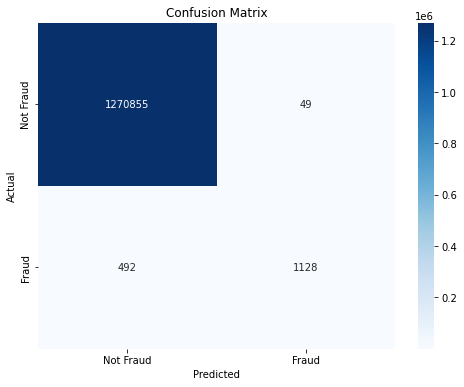

In [81]:
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42, verbose=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)


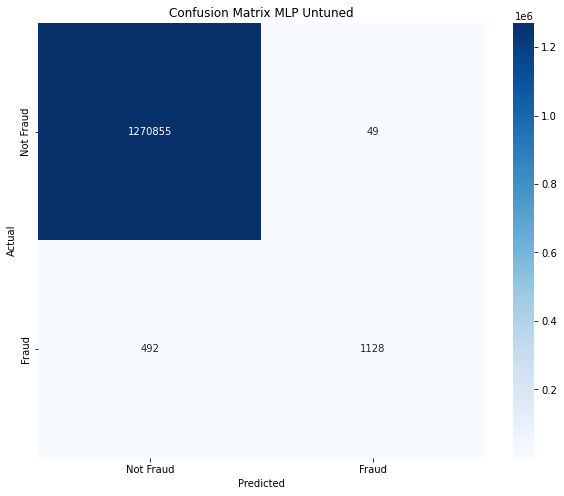

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix MLP Untuned')
plt.savefig('confusion_matrix_MLP_Untuned.png')
plt.show()

# Bayesian Model

In [9]:
!pip install --upgrade numpy

  Using cached numpy-1.24.4-cp38-cp38-macosx_10_9_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-macosx_10_9_x86_64.whl (19.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.1 requires numpy<=1.24.3,>=1.22, but you have numpy 1.24.4 which is incompatible.


In [1]:
import tensorflow_probability as tfp
from sklearn.metrics import f1_score

In [20]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [26]:
from sklearn.metrics import confusion_matrix

In [37]:
! pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.1 MB/s eta 0:00:00:00:01


# SMOTE to handle our imbalance 

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [62]:
import numpy as np

# Check for NaN values in X_train_resampled
nan_indices_x = np.isnan(X_train_resampled)
nan_count_x = np.sum(nan_indices_x)

# Check for NaN values in y_train_resampled
nan_indices_y = np.isnan(y_train_resampled)
nan_count_y = np.sum(nan_indices_y)

print("NaN values in X_train_resampled:", nan_count_x)
print("NaN values in y_train_resampled:", nan_count_y)

# Optionally, if you want to get the row indices where NaN values are in y_train_resampled
nan_indices_y_rows = np.where(nan_indices_y)[0]
print("Row indices with NaN values in y_train_resampled:", nan_indices_y_rows)


NaN values in X_train_resampled: 0
NaN values in y_train_resampled: 0
Row indices with NaN values in y_train_resampled: []


In [158]:
from tensorflow.keras.metrics import Recall

# Define F1 Score metric with custom settings
recall = Recall()

def make_variational_layer(units, activation):
    return tfpl.DenseReparameterization(
        units,
        activation=activation
    )

Bayesian_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_resampled.shape[1],)),
    make_variational_layer(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Define the negative log likelihood loss
def negative_log_likelihood(y_true, y_pred):
    # Assuming a Bernoulli distribution for binary classification
    # Adjust this based on your specific problem and distribution
    dist = tfp.distributions.Bernoulli(probs=y_pred)
    return -tf.reduce_sum(dist.log_prob(y_true))

# Compile your model with the F1 score metric
Bayesian_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy', 
    metrics=[recall]
)

# Train your model
Bayesian_model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate your model
y_pred_bayesian = Bayesian_model.predict(X_test)
y_pred_binary = (y_pred_bayesian > 0.5).astype(int)

# Save the model


Epoch 1/20
 19418/158860 [==>...........................] - ETA: 2:18 - loss: 68.6825 - recall_3: 0.5175

KeyboardInterrupt: 

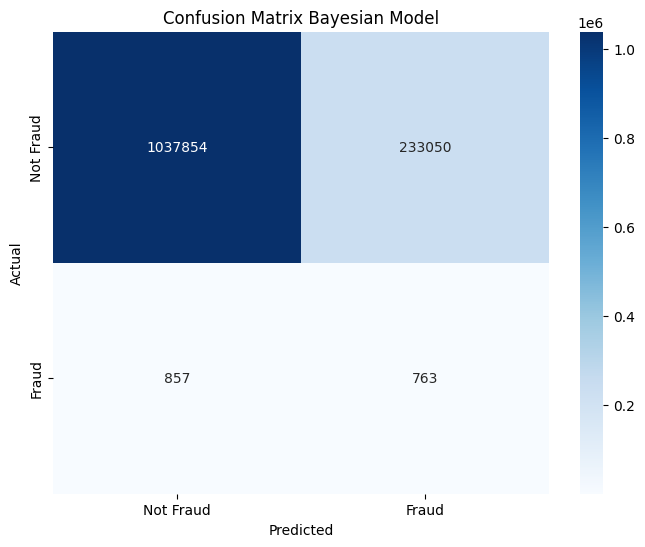

In [159]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Bayesian Model')
plt.show()

In [117]:
# Define the logistic regression model
logistic_regression_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with the number of features
    tf.keras.layers.Dense(1, activation='sigmoid')  # Single dense layer with sigmoid activation
])

# Compile the model
logistic_regression_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),  # Adjust the learning rate as needed
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # You can use different metrics like F1 score if needed
)

# Train the model
logistic_regression_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=3200)
y_pred_log = logistic_regression_model.predict(X_test)



Epoch 1/10
3178/3178 [==============================] - 5s 1ms/step - loss: 0.4964 - accuracy: 0.7404
Epoch 2/10
3178/3178 [==============================] - 3s 1ms/step - loss: 0.3291 - accuracy: 0.8470
Epoch 3/10
3178/3178 [==============================] - 3s 930us/step - loss: 0.2867 - accuracy: 0.8659
Epoch 4/10
3178/3178 [==============================] - 3s 990us/step - loss: 0.2598 - accuracy: 0.8864
Epoch 5/10
3178/3178 [==============================] - 3s 1ms/step - loss: 0.2400 - accuracy: 0.9019
Epoch 6/10
3178/3178 [==============================] - 3s 1ms/step - loss: 0.2245 - accuracy: 0.9122
Epoch 7/10
3178/3178 [==============================] - 3s 1ms/step - loss: 0.2122 - accuracy: 0.9193
Epoch 8/10
3178/3178 [==============================] - 3s 1ms/step - loss: 0.2022 - accuracy: 0.9241
Epoch 9/10
3178/3178 [==============================] - 3s 956us/step - loss: 0.1940 - accuracy: 0.9275
Epoch 10/10
39767/39767 [==============================] - 26s 656us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [119]:
y_pred_log_test = (y_pred_log > 0.5).astype(int)

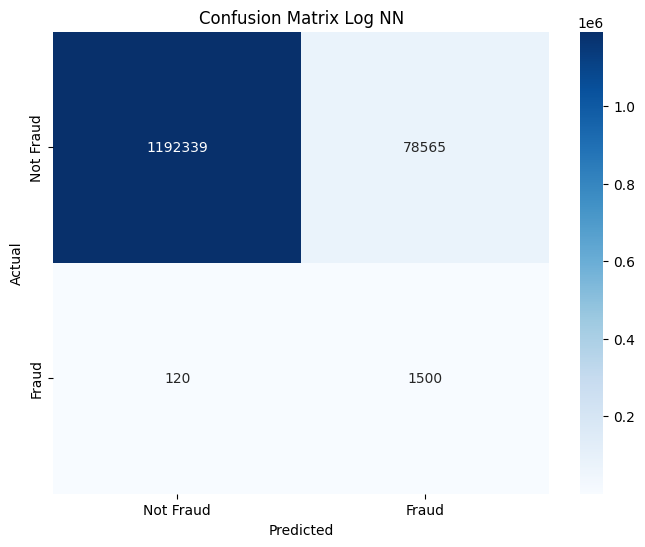

In [121]:
conf_matrix = confusion_matrix(y_test, y_pred_log_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Log NN')
plt.show()

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier



In [135]:
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

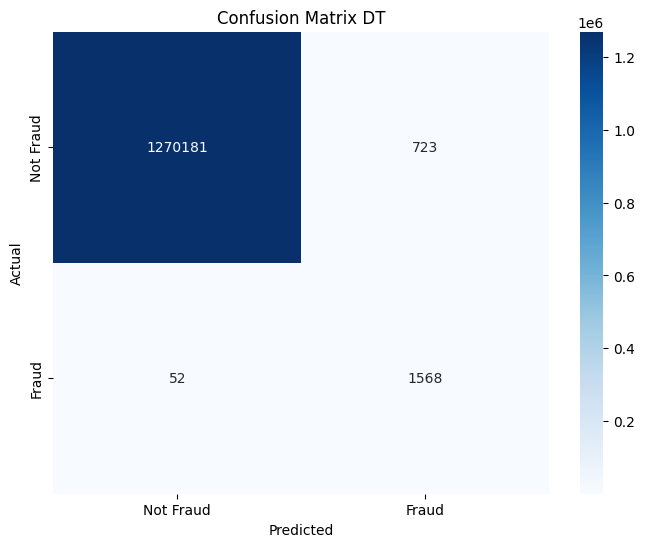

In [137]:
dt_pred = dt_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix DT')
plt.show()

In [138]:
# Train a Neural Network Classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
nn_classifier.fit(X_train_resampled, y_train_resampled)


/Users/abdulrahmanamer/opt/anaconda3/envs/Fraud/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

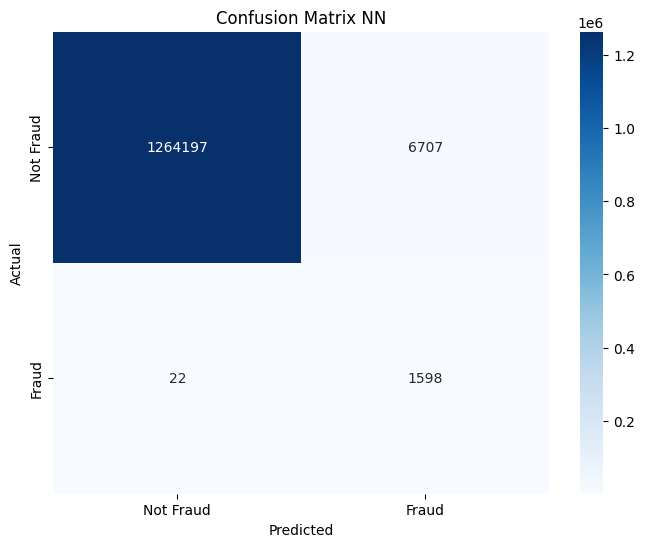

In [139]:
nn_pred = nn_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test,nn_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix NN')
plt.show()

In [142]:
combined_predictions = [int((dt + nn) >= 1) for dt, nn in zip(dt_pred, nn_pred)]

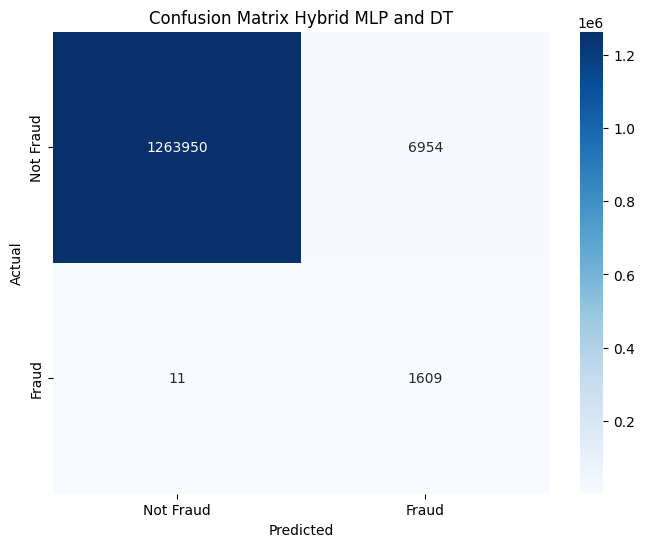

In [143]:
conf_matrix = confusion_matrix(y_test,combined_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Hybrid MLP and DT')
plt.show()

In [149]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [151]:
accuracy = accuracy_score(y_test, combined_predictions)
precision = precision_score(y_test, combined_predictions)
recall = recall_score(y_test, combined_predictions)
print(f'Combined Model Accuracy: {accuracy:.2f}')
print(f'Combined Model Precision: {precision:.2f}')
print(f'Combined Model Recall: {recall:.2f}')

Combined Model Accuracy: 0.99
Combined Model Precision: 0.19
Combined Model Recall: 0.99


# High Recall is a win.
## Identifying More Fraud Cases: Low precision means that the model may have a relatively high rate of false positives (non-fraudulent transactions classified as fraud). In some fraud detection systems, the focus may be on identifying as many potential fraud cases as possible, even at the cost of some false alarms. This is particularly important in cases where missing a true fraud case could have severe consequences, and a human expert can further investigate and confirm the fraud.